In [16]:
# vannillaa


from keras.layers import Conv2D
from keras.layers import UpSampling2D
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import RepeatVector
from keras.layers import Reshape
from keras.layers.merge import concatenate
from keras.utils import plot_model
from os import listdir
from pickle import load
import numpy as np


def define_model_baseline(img_h, img_w):

    # encoder
    
    inputs1 = Input(shape=(img_h, img_w, 3,))
    encoder_output = Conv2D(64, (3,3), activation='relu', padding='same', strides=2)(inputs1)
    encoder_output = Conv2D(128, (3,3), activation='relu', padding='same')(encoder_output)
    encoder_output = Conv2D(128, (3,3), activation='relu', padding='same', strides=2)(encoder_output)
    encoder_output = Conv2D(256, (3,3), activation='relu', padding='same')(encoder_output)
    encoder_output = Conv2D(256, (3,3), activation='relu', padding='same', strides=2)(encoder_output)
    encoder_output = Conv2D(512, (3,3), activation='relu', padding='same')(encoder_output)
    encoder_output = Conv2D(512, (3,3), activation='relu', padding='same')(encoder_output)
    encoder_output = Conv2D(256, (3,3), activation='relu', padding='same')(encoder_output)
    
    # decoder
    
    decoder_output = Conv2D(128, (3,3), activation='relu', padding='same')(encoder_output)
    decoder_output = UpSampling2D((2, 2))(decoder_output)
    decoder_output = Conv2D(64, (3,3), activation='relu', padding='same')(decoder_output)
    decoder_output = UpSampling2D((2, 2))(decoder_output)
    decoder_output = Conv2D(32, (3,3), activation='relu', padding='same')(decoder_output)
    decoder_output = Conv2D(16, (3,3), activation='relu', padding='same')(decoder_output)
    decoder_output = Conv2D(2, (3, 3), activation='tanh', padding='same')(decoder_output)
    decoder_output = UpSampling2D((2, 2))(decoder_output)


    # tie it together 
    model = Model(inputs=inputs1, outputs=decoder_output)
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['acc'])
    # summarize model
    print(model.summary())
    plot_model(model, to_file='autoencoder_colorization_baseline.png', show_shapes=True)
    
    return model

model=

In [17]:
# -*- coding: utf-8 -*-
"""
https://github.com/baldassarreFe/deep-koalarization
"""
from os import listdir
from pickle import dump
from pickle import load
from keras.applications.vgg16 import VGG16
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.models import Model
import numpy as np
from keras.layers import Input
from keras.layers import Dense
from keras.utils import plot_model
from keras.models import load_model


"""
Turning RGB into YCrCb can be done by a simple matrix multiplication.
The values in the matrix can be obtained from the official Jpeg doc here:
https://www.itu.int/rec/T-REC-T.871-201105-I/en

"""
def RGBtoYCC(arr):
    xform = np.array([[.299, .587, .114], [-.1687, -.3313, .5], [.5, -.4187, -.0813]])
    ycbcr = arr.dot(xform.T)
    ycbcr[:,:,[1,2]] += 128
    return np.uint8(ycbcr)
      
def YCCtoRGB(arr):
    xform = np.array([[1, 0, 1.402], [1, -0.34414, -.71414], [1, 1.772, 0]])
    rgb = arr.astype(np.float)
    rgb[:,:,[1,2]] -= 128
    rgb = rgb.dot(xform.T)
    np.putmask(rgb, rgb > 255, 255)
    np.putmask(rgb, rgb < 0, 0)
    return np.uint8(rgb)

def RGBtoGrayYCC(arr):
    #this function takes a RGB input and extracts the Y portion of YCC
    ycc = RGBtoYCC(arr)
    ret = np.zeros_like(ycc[:, :, 0])
    ret[:, :] = ycc[:, :, 0]
    return ret

'''
A note on taking the gray scale of a colored image. 
To turn a colored image into a gray scale image, use the following step:
    1. Change to YCC format
    2. Keep the Y (1st) channel, and change the other channels to 128 (**not 0**)
    3. Change the YCC format back to RGB format
    
An alternative and equivalent way is to:
    1. Change to YCC format
    2. Copy the Y (1st) channel 3 times, and use this as the RGB format
    
The above two approaches will generate the same matrix. This is so because the Y channel is the lumnia channel, and if all three channels
in the RGB are the same as Y, then it is a gray scale of the original
'''
def YCCtoGrayRGB(arr):
    #this function takes YCC input and turns it into a RGB gray image
    ret = np.zeros_like(arr)
    ret[:, :, 0] = arr[:, :, 0]
    ret[:, :, 1] = arr[:, :, 0]
    ret[:, :, 2] = arr[:, :, 0]
    return ret

171.tiff
263.tiff
091.tiff
443.tiff


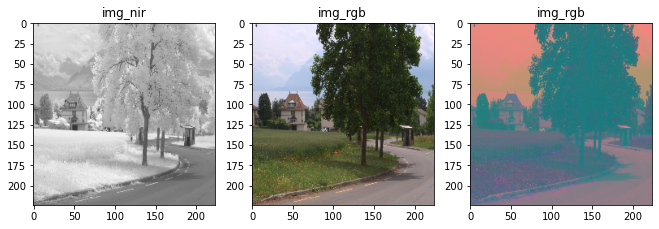

In [48]:
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline
progress=0
path = '/home/netrunner/Desktop/Raks/val_256/NIR'
for file in listdir(path):
    nir_img_path = '/home/netrunner/Desktop/Raks/val_256/NIR/' + file
    rgb_img_path = '/home/netrunner/Desktop/Raks/val_256/RGB/' + file
    
    
    img_nir = load_img(nir_img_path, target_size=(224, 224)) #input_shape is (224,224,3) for VGG16 if the last 3 fc layers are used. If not used, can use any input_shape
    
    img_rgb = load_img(rgb_img_path, target_size=(224, 224))
    
    img_arr_rgb = img_to_array(img_rgb) #change to np array rgb image
#     for VGG16 input
    img_arr_nir = img_to_array(img_nir) #change to np array nir image 
    
    img_arr_ycc = RGBtoYCC(img_arr_rgb) #for loss
    
    img_arr_ycc_nir = RGBtoYCC(img_arr_rgb) #for autoencoder input
    
#     img_arr_rgb_gray = YCCtoGrayRGB(img_arr_ycc) #for VGG16 input
    if(file=="001.tiff"):
        f=plt.figure(figsize=(15,15))
        ax=f.add_subplot(141)
        ax.title.set_text("img_nir")
        plt.imshow(img_nir)
        ax=f.add_subplot(142)
        ax.title.set_text("img_rgb")
        plt.imshow(img_rgb)
        ax=f.add_subplot(143)
        ax.title.set_text("img_rgb")
        plt.imshow(img_arr_ycc_nir)
    
    x = np.expand_dims(img_arr_nir, axis=0) #expand to include batch dim at the beginning
    x = preprocess_input(x) #make input confirm to VGG16 input format
#     fc2_features = feature_extract_model.predict(x)
    
    data = dict()
    data['img_arr_rgb'] = img_arr_rgb
    data['img_arr_ycc'] = img_arr_ycc
    data['img_arr_ycc_nir'] = img_arr_ycc_nir
    data['img_arr_nir'] = img_arr_nir
#     data['fc2_features'] = fc2_features
    file_save_name = '/home/netrunner/Desktop/Raks/val_256/processed/' + file.split('.')[0] + 'preproc.pk' #take the file name and use as id in dict
    
    fid = open(file_save_name, 'wb')
    dump(data, fid)
    fid.close()
    
    progress+=1
    if progress % 100 ==0:
        print(file)

In [19]:
def data_generator_baseline(training_dir, num_train_samples, batch_size):
    # loop for ever over images
    current_batch_size=0
    while 1:
        files = listdir(training_dir) #'coco_images\processed'
        for file_idx in range(num_train_samples):
            # retrieve the photo feature
            if current_batch_size == 0:
                X1, Y = list(), list()
            file = training_dir+ '/' + files[file_idx]
            fid = open(file, 'rb')
            data = load(fid)
            fid.close()
            
            img_arr_ycc_crcb = data['img_arr_ycc'][:,:,1:]
            img_arr_rgb_gray = data['img_arr_nir']
    
            X1.append(img_arr_rgb_gray/255)
            Y.append(img_arr_ycc_crcb/255)
            current_batch_size += 1
            if current_batch_size == batch_size:
                current_batch_size = 0
                yield [np.array(X1), np.array(Y)]


In [22]:

training_dir = '/home/netrunner/Desktop/Raks/val_256/processed'
num_train_samples = 477
batch_size = 32
steps_per_epoch = np.floor(num_train_samples/batch_size)
epochs = 3

#%%
epochs = 1

for i in range(epochs):
	# create the data generator
	generator = data_generator_baseline(training_dir, num_train_samples, batch_size)
	model = define_model_baseline(224,224)
	# fit for one epoch
	fit_history = model.fit_generator(generator, epochs=10, steps_per_epoch=steps_per_epoch, verbose=1)
	# save model
	model.save('model_merge_' + str(i) + '.h5')
	print("cat")

Model: "model_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
conv2d_105 (Conv2D)          (None, 112, 112, 64)      1792      
_________________________________________________________________
conv2d_106 (Conv2D)          (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_107 (Conv2D)          (None, 56, 56, 128)       147584    
_________________________________________________________________
conv2d_108 (Conv2D)          (None, 56, 56, 256)       295168    
_________________________________________________________________
conv2d_109 (Conv2D)          (None, 28, 28, 256)       590080    
_________________________________________________________________
conv2d_110 (Conv2D)          (None, 28, 28, 512)       1180

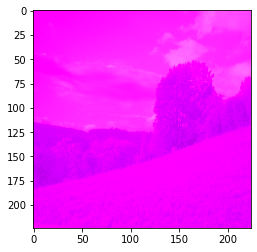

In [34]:
import matplotlib.pyplot as plt


model_merge = load_model('model_merge_0.h5')

x = np.expand_dims(img_arr_nir, axis=0) #expand to include batch dim at the beginning
x = preprocess_input(x) #make input confirm to VGG16 input format
fc2_features = model.predict(x)
crcb_output_merge = model.predict([ np.reshape(img_arr_nir, (-1,224,224,3))], verbose=0)
ycc_output_merge = np.copy(img_arr_ycc)
ycc_output_merge[:,:,1:] = 255*np.squeeze(crcb_output_merge)
rgb_output_merge = YCCtoRGB(ycc_output_merge)


plt.imshow(rgb_output_merge, cmap='gray', vmin=0, vmax=255)